In [1]:
from model import SugarscapeCg

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 20})

## Helper functions

In [2]:
def run_model(model):
    model.run_model()

    output = model.datacollector.get_model_vars_dataframe()
    print(output)

    return output

In [3]:
def get_data(df, key):
    all_rows = df[0][key].values

    for i in range(1, len(df)):
        wealths = df[i][key].values
        all_rows = np.vstack([all_rows, wealths])

    all_rows = all_rows.T

    return all_rows

In [4]:
def get_means_cis(data):
    means = []
    cis = []

    for i in range(data.shape[0]):
        means.append(np.mean(data[i]))
        cis.append(1.96*np.std(data[i])/np.sqrt(data.shape[0]))

    return means, cis

## Plotting functions

In [5]:
def plot_errorbars(means, cis, y_axis_label):
    plt.errorbar(x=range(len(means)), y=means, yerr=cis, ecolor='red')
    plt.xlabel("Number of steps")
    plt.ylabel(y_axis_label)

In [6]:
def plot_district_crimes(district_means, district_cis, district_names, district_colors):
    for district_index in range(len(district_means)):
        plt.errorbar(x=range(len(district_means[district_index])), y=district_means[district_index], yerr=district_cis[district_index], label=district_names[district_index], color=district_colors[district_index], ecolor=district_colors[district_index])
        plt.xlabel("Number of steps")
        plt.ylabel('Number of crimes')
    plt.legend()

In [7]:
def plot_district_crimes_bar(district_means, district_cis, district_names, district_colors):
    plt.bar(np.arange(len(district_means)), height=district_means, yerr=district_cis, color=district_colors, capsize=10)
    plt.xticks(np.arange(len(district_means)), district_names)
    # plt.xlabel("Number of steps")
    plt.ylabel('Number of crimes')

In [8]:
def get_average_crime_per_distr(outputs, district_names, burn_in):
    avg_crimes_per_distr_dict = {'Centrum': 0, 'Nieuw-West': 0, 'Noord': 0, 'Oost': 0, 'West': 0, 'Zuid': 0, 'Zuidoost': 0, 'Undefined':0} 
    for i in range(len(outputs)):
        for district in district_names:
            avg_crimes_per_distr_dict[district] += np.mean(outputs[i].iloc[burn_in:][district])
    for district in district_names:
        avg_crimes_per_distr_dict[district] /= len(outputs)
    return dict(sorted(avg_crimes_per_distr_dict.items(), key=lambda item:item[1]))

def plot_district_means_bar(avg_crimes_per_distr_dict, district_colors):
    plt.bar(avg_crimes_per_distr_dict.keys(), avg_crimes_per_distr_dict.values(), color=district_colors)
    plt.legend()
    plt.show()
    return

## Run model

In [9]:
num_runs = 2
outputs = []

for run in range(num_runs):
    m = SugarscapeCg(search_radius=1, radius=1)
    print(f"search radius for criminal is :{m.search_radius}", "\n", f"catch radius is :{m.radius}")
    output = run_model(m)
    outputs.append(output)

search radius for criminal is :1 
 catch radius is :1
Initial number Sugarscape Agent:  578
[1, 750.0]
[2, 873.0]
[3, 871.0]
[4, 924.0]
[5, 882.0]
[6, 879.0]
[7, 934.0]
[8, 1034.0]
[9, 1090.0]
[10, 1115.0]
[11, 1241.0]
[12, 1324.0]
[13, 1407.0]
[14, 1568.0]
[15, 1643.0]
[16, 1609.0]
[17, 1671.0]
[18, 1785.0]
[19, 1733.0]
[20, 1762.0]
[21, 2014.0]
[22, 2305.0]
[23, 2530.0]
[24, 2820.0]
[25, 3040.0]
[26, 3142.0]
[27, 3210.0]
[28, 3470.0]
[29, 3757.0]
[30, 4103.0]
[31, 4248.0]
[32, 4603.0]
[33, 5063.0]
[34, 5359.0]
[35, 5672.0]
[36, 5990.0]
[37, 6374.0]
[38, 6576.0]
[39, 6982.0]
[40, 7458.0]
[41, 7836.0]
[42, 8180.0]
[43, 8370.0]
[44, 8736.0]
[45, 9140.0]
[46, 9436.0]
[47, 9849.0]
[48, 10225.0]
[49, 10609.0]
[50, 10758.0]
[51, 11002.0]
[52, 11253.0]
[53, 11410.0]
[54, 11592.0]
[55, 11889.0]
[56, 12251.0]
[57, 12479.0]
[58, 12783.0]
[59, 13031.0]
[60, 13406.0]
[61, 13539.0]
[62, 13909.0]
[63, 14138.0]
[64, 14481.0]
[65, 14743.0]
[66, 14954.0]
[67, 15113.0]
[68, 15288.0]
[69, 15555.0]
[70, 

In [10]:
print(np.mean(outputs[1]["Zuid"]), np.mean(outputs[1]["Centrum"]))

9.333333333333334 4.0497512437810945


## Plots

### Criminal wealths

In [11]:
all_wealths = get_data(outputs, 'Criminal Wealth')

# print(all_wealths[0])
print(all_wealths.shape)

(201, 2)


In [12]:
mean_wealths, cis_wealths = get_means_cis(all_wealths)

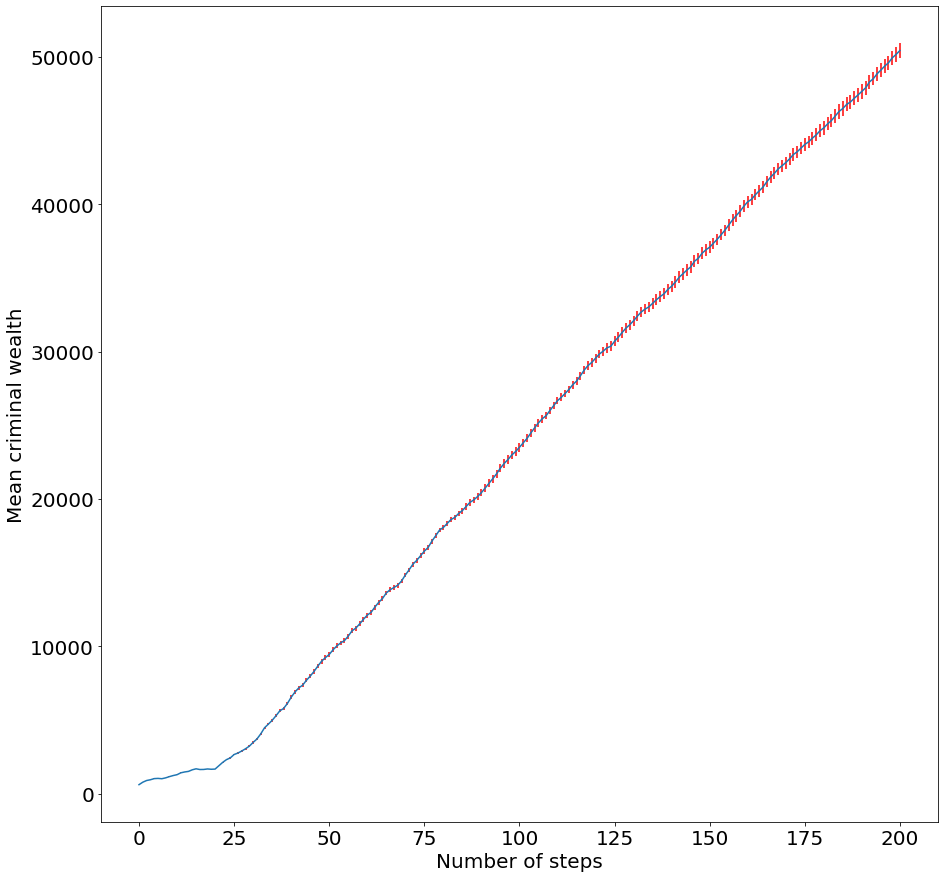

In [13]:
plot_errorbars(mean_wealths, cis_wealths, "Mean criminal wealth")

### Criminals in jail

In [14]:
jail_count = get_data(outputs, 'Criminal in Jail Count')

print(jail_count.shape)

(201, 2)


In [15]:
mean_jail_count, cis_jail_count = get_means_cis(jail_count)

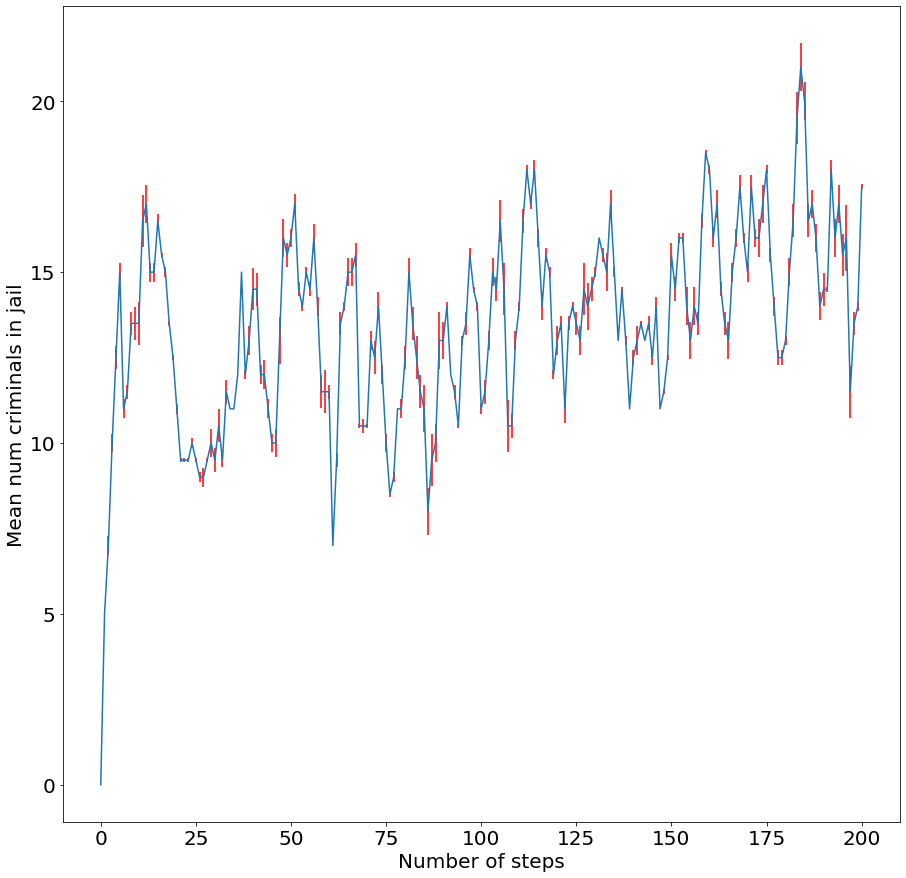

In [16]:
plot_errorbars(mean_jail_count, cis_jail_count, "Mean num criminals in jail")

### Crimes committed

In [17]:
crimes_count = get_data(outputs, 'Crimes commited')

print(crimes_count.shape)

(201, 2)


In [18]:
mean_crimes_count, cis_crimes_count = get_means_cis(crimes_count)

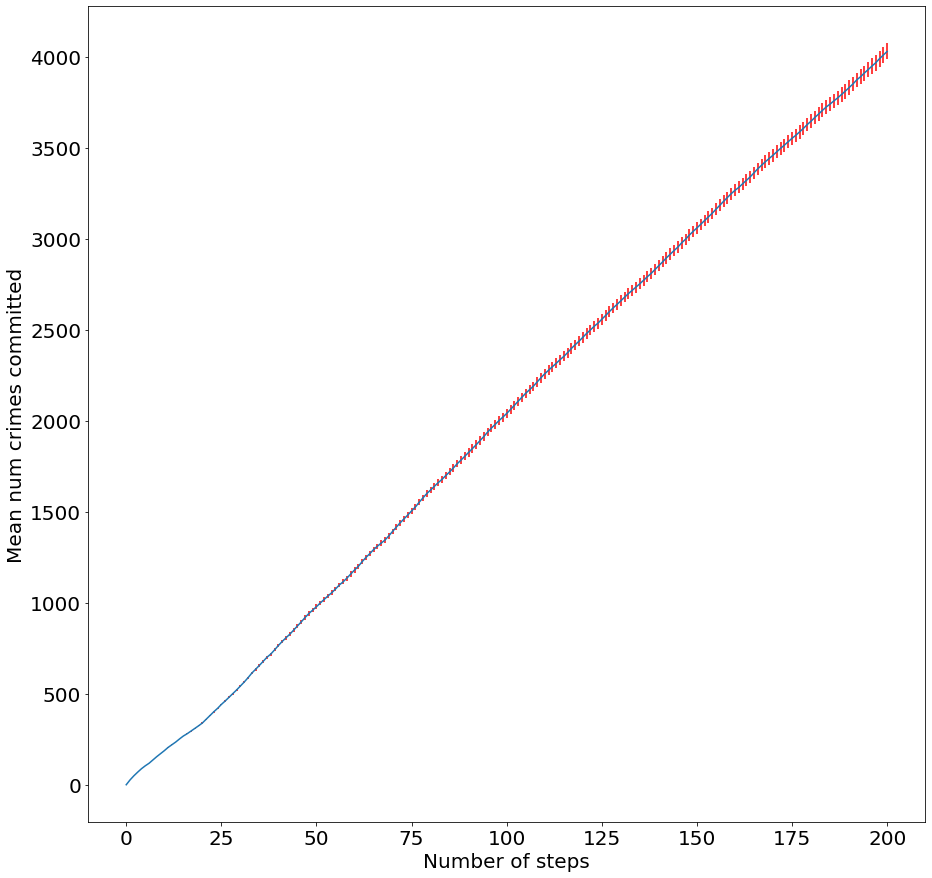

In [19]:
plot_errorbars(mean_crimes_count, cis_crimes_count, "Mean num crimes committed")

### District crimes

No handles with labels found to put in legend.


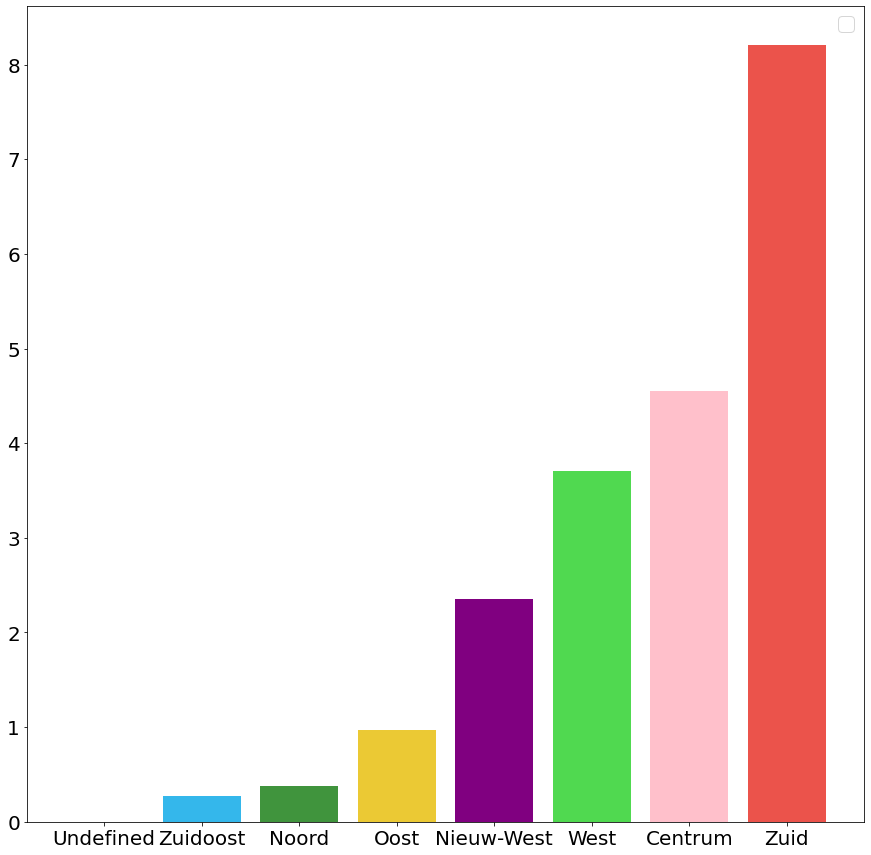

In [22]:
district_names = ['Centrum', 'Noord', 'West', 'Zuid', 'Zuidoost', 'Oost', 'Nieuw-West']
# district_colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink']
district_colors = ['#eb534b', '#34b7eb', '#40943d', '#ebc934', '#800080', '#50d950', '#ffc0cb']

avg_crimes_per_distr_dict = get_average_crime_per_distr(outputs, district_names, 0)
plot_district_means_bar(avg_crimes_per_distr_dict,district_colors)

In [ ]:
all_district_means = []
all_district_cis = []

for district in district_names:
    crimes_count = get_data(outputs, district)
    mean_crimes_count, cis_crimes_count = get_means_cis(crimes_count)
    all_district_means.append(mean_crimes_count)
    all_district_cis.append(cis_crimes_count)

In [ ]:
plot_district_crimes(all_district_means, all_district_cis, district_names, district_colors)

In [ ]:
print(len(all_district_means))
print(len(all_district_means[0]))

final_district_means = []
for district in all_district_means:
    final_district_means.append(district[-1])

print(final_district_means)

final_district_cis = []
for district in all_district_cis:
    final_district_cis.append(district[-1])

print(final_district_cis)

In [ ]:
# Sort by size
sorting = zip(final_district_means, district_names, district_colors)
final_district_means, district_names, district_colors = zip(*sorted(sorting, key=lambda x : x[0]))

In [ ]:
plot_district_crimes_bar(final_district_means, final_district_cis, district_names, district_colors)